In [66]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
from model import LUNAR
from utils.data import Case3D

In [5]:
# the hyperparameter of the pretrained model

k = 100

# postprocessing
threshold = 0.5

# visualization
size = 0.1
alpha = 0.1


In [3]:
real_filename = "data/real/2022-06-17_C15_Pos1/stack_ROI.3d"

In [ ]:
best_checkpoint = "checkpoints/model_95.pth"

In [6]:
real_case = Case3D(filename=real_filename)
real_graph = real_case.get_graph(k=k)

In [7]:
model = LUNAR(k=k)
model.load_state_dict(
    torch.load(best_checkpoint)
)

<All keys matched successfully>

In [77]:
def inference(model, real_filename):
    real_case = Case3D(filename=real_filename)
    real_graph = real_case.get_graph(k=k)

    real_file_dir = os.path.dirname(real_filename)
    
    model.eval()
    with torch.no_grad():
        pred = model(real_graph)
        plt.hist(x=pred.detach().cpu().numpy(), bins=100)
        plt.savefig(os.path.join(real_file_dir, "histogram.png"))
        plt.close()

        prediction = pred.detach().cpu().numpy() > threshold
        print("the ratio of real data that is predicted to be positive: ", np.sum(prediction) / len(prediction))


        coordinates, label = real_case.get_feature_label()
        normalized_xyz = (coordinates - coordinates.min()) / (coordinates.max() - coordinates.min())
        x, y, z = normalized_xyz[:, 0], normalized_xyz[:, 1], normalized_xyz[:, 2]

        fig = plt.figure(figsize=(10, 10))

        ax = fig.add_subplot(2, 2, 1, projection='3d')
        ax.scatter(x, y, z, alpha=alpha, s=size)
        ax.set_title("original data")

        ax = fig.add_subplot(2, 2, 2, projection='3d')
        ax.scatter(x, y, z, c=prediction, alpha=alpha, s=size)
        ax.set_title("visualized with prediction")

        ax = fig.add_subplot(2, 2, 3, projection='3d')
        ax.scatter(x[prediction], y[prediction], z[prediction], alpha=alpha, s=size)
        ax.set_title("visualized with prediction (only positive)")

        ax = fig.add_subplot(2, 2, 4, projection='3d')
        ax.scatter(x[~prediction], y[~prediction], z[~prediction], alpha=alpha, s=size)
        ax.set_title("visualized with prediction (only noisy data)")
        fig.savefig(os.path.join(real_file_dir, "visualization.png"))
        plt.close()

        with open(os.path.join(real_file_dir, "prediction.txt"), 'wt') as f:
            f.writelines(
                pred.detach().cpu().numpy().astype(str).tolist()
            )        

In [78]:
for folder in os.listdir("data/real"):
    real_filename = os.path.join("data/real", folder, "stack_ROI.3d")
    inference(model, real_filename)

the ratio of real data that is predicted to be positive:  0.5008425598841636
the ratio of real data that is predicted to be positive:  0.4777834008097166
the ratio of real data that is predicted to be positive:  0.5867949278530826
the ratio of real data that is predicted to be positive:  0.5963819885953988
the ratio of real data that is predicted to be positive:  0.478648057494011


# a sample routine of visualization the pretrained model on real world data

In [36]:
pred = model(real_graph)

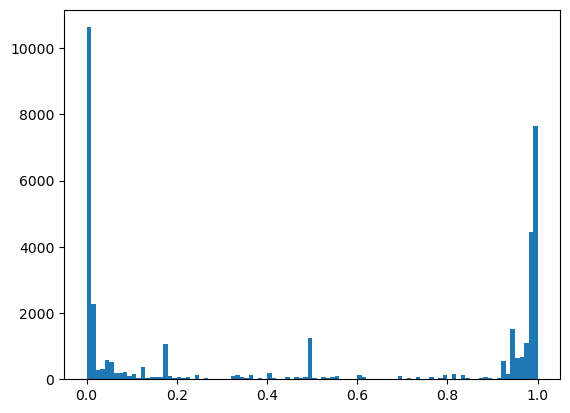

In [37]:
plt.hist(x=pred.detach().cpu().numpy(), bins=100)
plt.show()

In [51]:
threshold = 0.5
prediction = pred.detach().cpu().numpy() > threshold
print("the ratio of real data that is predicted to be positive: ", np.sum(prediction) / len(prediction))

the ratio of real data that is predicted to be positive:  0.478648057494011


In [52]:
coordinates, label = real_case.get_feature_label()

In [53]:
normalized_xyz = (coordinates - coordinates.min()) / (coordinates.max() - coordinates.min())

In [54]:
x, y, z = normalized_xyz[:, 0], normalized_xyz[:, 1], normalized_xyz[:, 2]

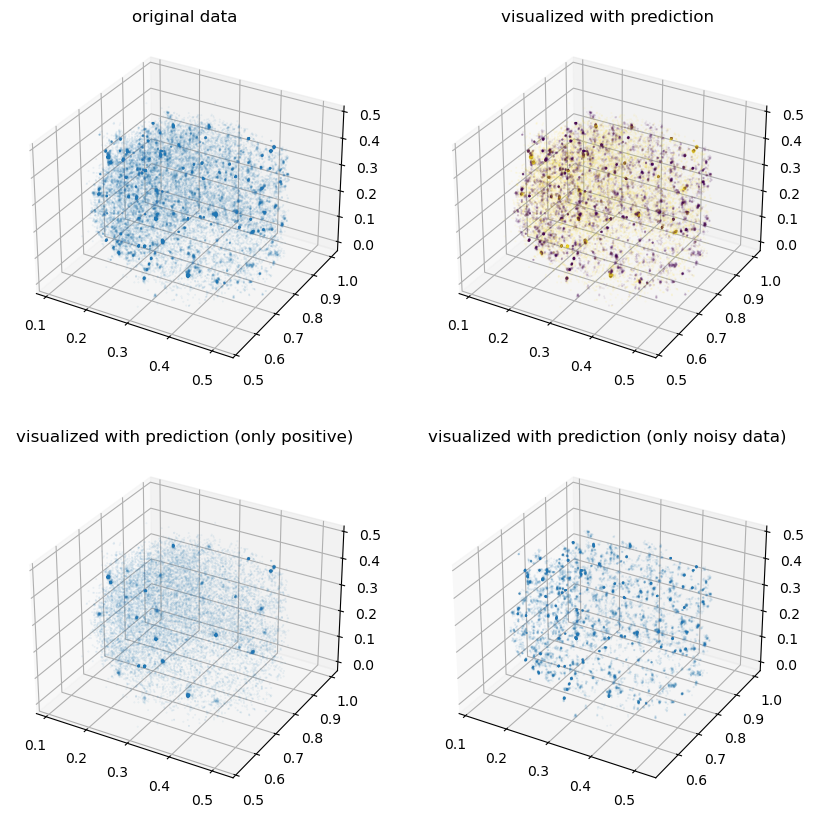

In [63]:
fig = plt.figure(figsize=(10, 10))

size = 0.1
alpha = 0.1

ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.scatter(x, y, z, alpha=alpha, s=size)
ax.set_title("original data")

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(x, y, z, c=prediction, alpha=alpha, s=size)
ax.set_title("visualized with prediction")

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(x[prediction], y[prediction], z[prediction], alpha=alpha, s=size)
ax.set_title("visualized with prediction (only positive)")

ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(x[~prediction], y[~prediction], z[~prediction], alpha=alpha, s=size)
ax.set_title("visualized with prediction (only noisy data)")